# Exercise 2- MLA Lab


### 1. Use pandas library and perform the following


*   Read employees.csv file (file given in LMS)
* Find the number of non-null values in each column present.
* Remove the rows containing null values from the non-numeric columns.
* Find out the columns containing only numeric values.
* Create a pandas dataframe containing count, min value, max value, mean, standard
deviation for those columns containing numeric values alone.




In [53]:
import pandas as pd

In [54]:
file_path="/content/employees.csv"
df=pd.read_csv(file_path)

In [55]:
not_null_count= df.notnull().sum()
print("Number of not null values is: ")
print( not_null_count)

Number of not null values is: 
First Name            933
Gender                855
Start Date           1000
Last Login Time      1000
Salary               1000
Bonus %              1000
Senior Management     933
Team                  957
dtype: int64


In [56]:
non_numeric_cols= df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time',
       'Senior Management', 'Team'],
      dtype='object')


In [57]:
df_cleaned = df.dropna(subset=non_numeric_cols)

In [58]:
#numeric columns
numeric_cols=df_cleaned.select_dtypes(include=['number']).columns

In [59]:
#creating a dataframe containing count, min value, max value, mean, standard deviation for those columns containing numeric values alone.
summary_df = df_cleaned[numeric_cols].describe().loc[['count', 'min', 'max', 'mean', 'std']].T

In [60]:
print("\nSummary DataFrame for numeric columns:")
print(summary_df)


Summary DataFrame for numeric columns:
         count        min         max          mean           std
Salary   764.0  35013.000  149908.000  90433.196335  32864.665282
Bonus %  764.0      1.015      19.944     10.148041      5.608733


### 2. Use pandas and matplotlib/seaborn for the following:



*    Read the stores.xlsx file (file given in LMS)
*   Create a column called “shipment_days” which should contain the difference in
days between order date and ship date
* Create suitable graphs using the numeric columns available in the data by using matplotlib or seaborn.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
file_path = "/content/stores.xlsx"
df = pd.read_excel(file_path)

In [63]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0       1  CA-2020-152156 2020-11-08 2020-11-11    Second Class   
1       2  CA-2020-152156 2020-11-08 2020-11-11    Second Class   
2       3  CA-2020-138688 2020-06-12 2020-06-16    Second Class   
3       4  US-2019-108966 2019-10-11 2019-10-18  Standard Class   
4       5  US-2019-108966 2019-10-11 2019-10-18  Standard Class   

  Country/Region Region         Category Sub-Category  \
0  United States  South        Furniture    Bookcases   
1  United States  South        Furniture       Chairs   
2  United States   West  Office Supplies       Labels   
3  United States  South        Furniture       Tables   
4  United States  South  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address L

In [64]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Creating the shipment column
df['shipment_days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [65]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0       1  CA-2020-152156 2020-11-08 2020-11-11    Second Class   
1       2  CA-2020-152156 2020-11-08 2020-11-11    Second Class   
2       3  CA-2020-138688 2020-06-12 2020-06-16    Second Class   
3       4  US-2019-108966 2019-10-11 2019-10-18  Standard Class   
4       5  US-2019-108966 2019-10-11 2019-10-18  Standard Class   

  Country/Region Region         Category Sub-Category  \
0  United States  South        Furniture    Bookcases   
1  United States  South        Furniture       Chairs   
2  United States   West  Office Supplies       Labels   
3  United States  South        Furniture       Tables   
4  United States  South  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address L

In [66]:
numeric_columns = df.select_dtypes(include=['number']).columns

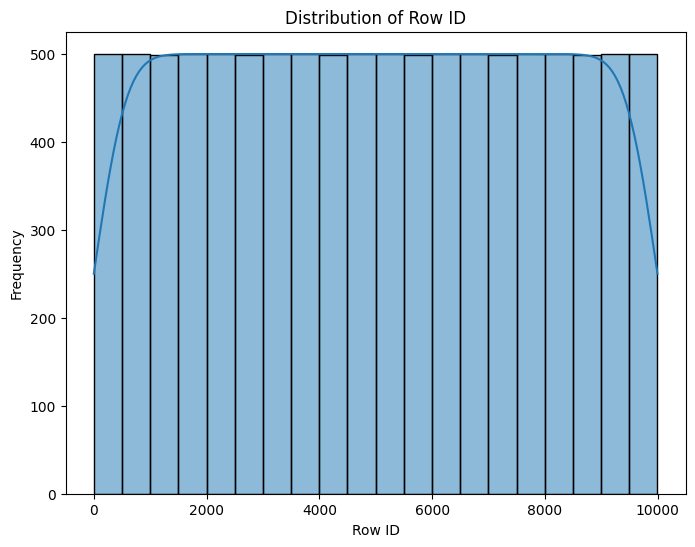

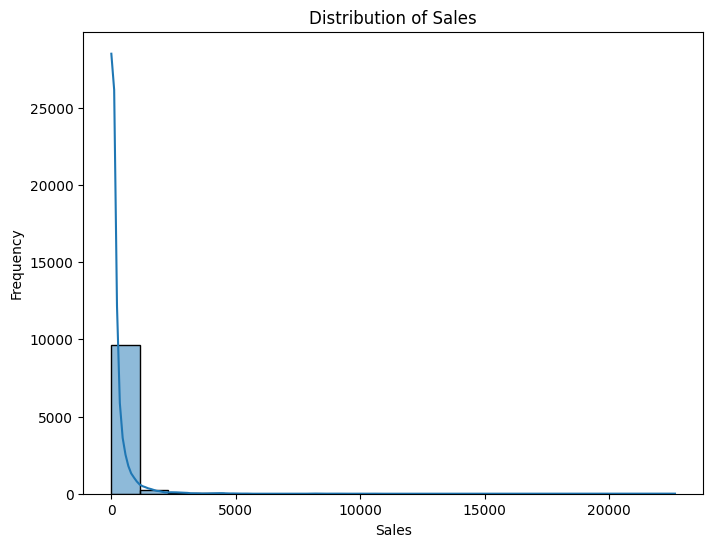

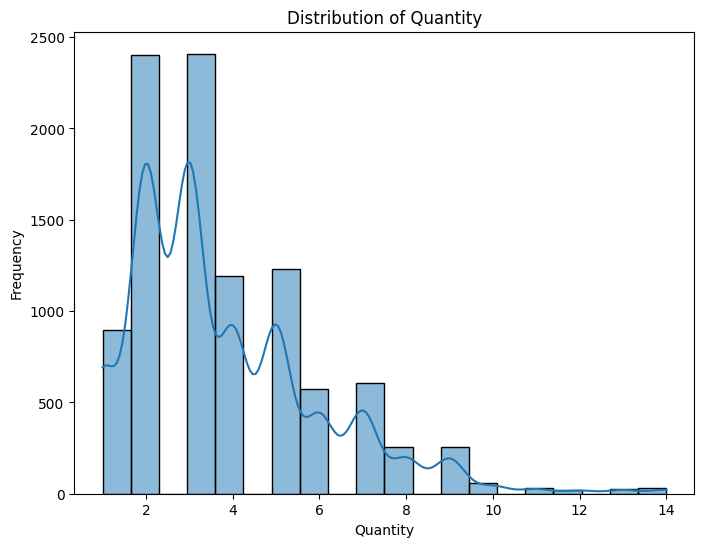

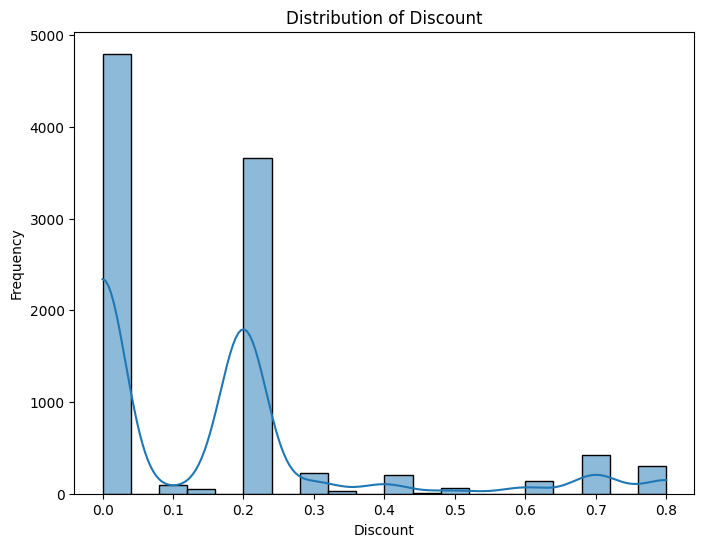

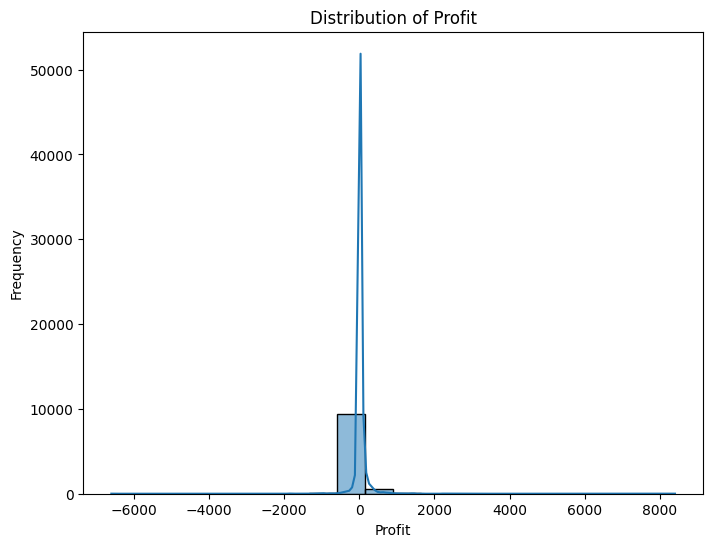

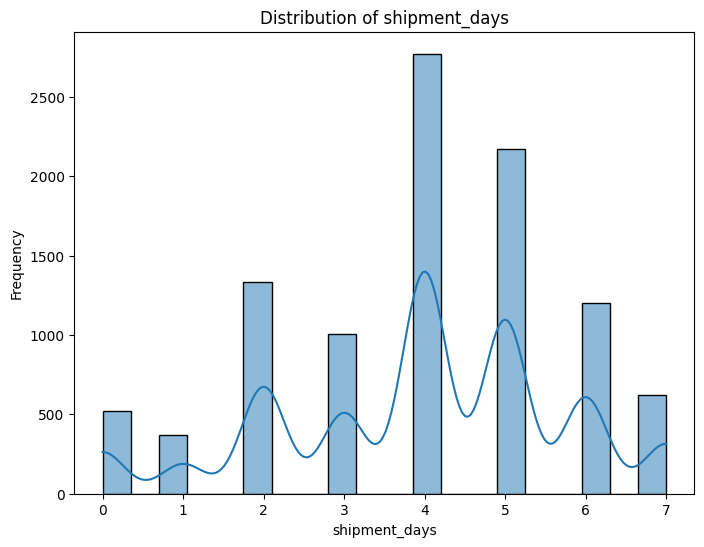

In [67]:
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


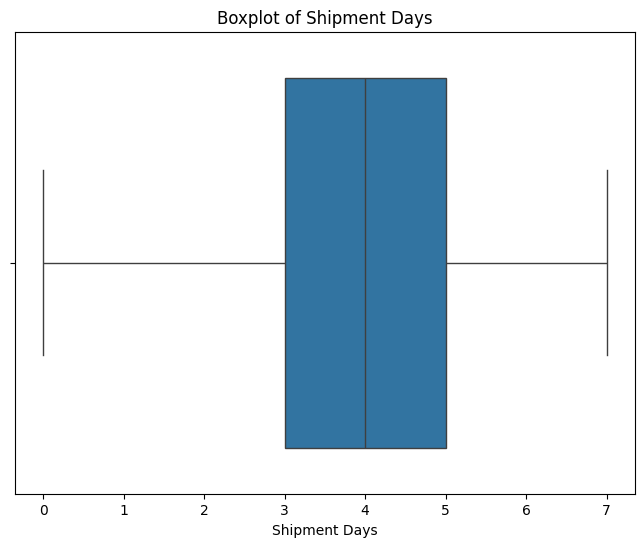

In [68]:
#visualizing the shipment
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['shipment_days'])
plt.title('Boxplot of Shipment Days')
plt.xlabel('Shipment Days')
plt.show()

### 3. Use Pandas and perform the following:

* Read the file ex2.csv
* Fill the missing values in the salary column using the appropriate methods
* Check for outliers in the salary column. Remove all the outliers present.
* Remove all other null values present in the data.
* List down the number of unique values in each categorical column present in the
data.
* Find the average salary degree-wise and state-wise.
* Find the min, max, average salary for different specialization and 12th board.
* Create suitable charts.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
file_path = "/content/ex2.csv"
df = pd.read_csv(file_path)

In [71]:
print(df.columns.tolist())

['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'Salary']


In [72]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

In [73]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [74]:
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

In [75]:
df = df.dropna()


In [76]:
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].nunique() for col in categorical_columns}
print("\nNumber of unique values in each categorical column:")
print(unique_values)


Number of unique values in each categorical column:
{'Gender': 2, 'DOB': 1439, '10board': 188, '12board': 231, 'Degree': 4, 'Specialization': 40, 'CollegeState': 26}


In [77]:
avg_salary_Degree = df.groupby('Degree')['Salary'].mean()
avg_salary_state = df.groupby('CollegeState')['Salary'].mean()

In [78]:
print("\nAverage salary degree-wise:")
print(avg_salary_Degree)
print("\nAverage salary state-wise:")
print(avg_salary_state)


Average salary degree-wise:
Degree
B.Tech/B.E.      284842.147976
M.Sc. (Tech.)    460000.000000
M.Tech./M.E.     295781.230217
MCA              248611.423873
Name: Salary, dtype: float64

Average salary state-wise:
CollegeState
Andhra Pradesh       312567.875516
Assam                365000.000000
Bihar                301250.000000
Chhattisgarh         255245.515932
Delhi                321110.676087
Goa                  450000.000000
Gujarat              254895.814870
Haryana              277082.368739
Himachal Pradesh     362671.861152
Jammu and Kashmir    350000.000000
Jharkhand            346953.101920
Karnataka            311336.866021
Kerala               269332.348597
Madhya Pradesh       284731.475241
Maharashtra          271432.786901
Meghalaya            175000.000000
Orissa               294806.465383
Punjab               275367.637749
Rajasthan            275340.897901
Sikkim               306718.611521
Tamil Nadu           266595.606804
Telangana            276037.267648


In [79]:
salary_stats = df.groupby(['Specialization', '12board'])['Salary'].agg(['min', 'max', 'mean'])
print("\nSalary stats for specialization and 12th board:")
print(salary_stats)


Salary stats for specialization and 12th board:
                                                                                   min  \
Specialization                          12board                                          
aeronautical engineering                baord of intermediate education  120000.000000   
                                        state board                      145000.000000   
applied electronics and instrumentation cbse                             306718.611521   
                                        icse                             275000.000000   
                                        state board                      175000.000000   
...                                                                                ...   
other                                   maharashtra                      110000.000000   
                                        state board                      130000.000000   
                                        wbchse     

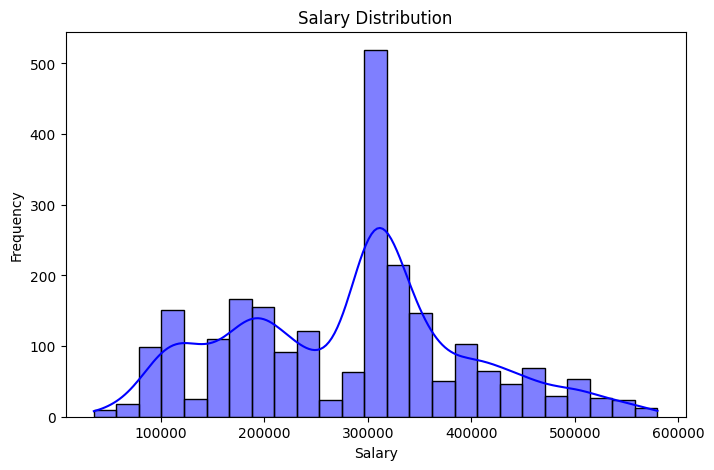

In [80]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True, color='blue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

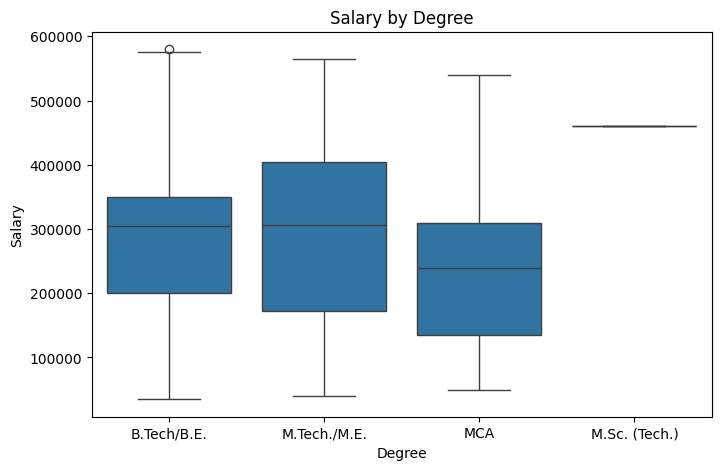

In [81]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Degree', y='Salary', data=df)
plt.title('Salary by Degree')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

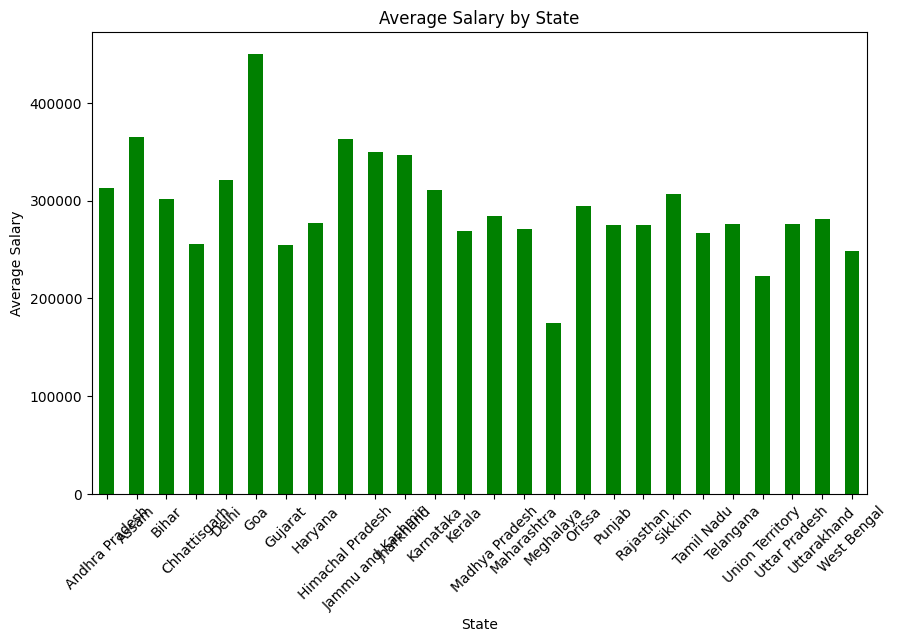

In [82]:
plt.figure(figsize=(10, 6))
avg_salary_state.plot(kind='bar', color='green')
plt.title('Average Salary by State')
plt.xlabel('State')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()